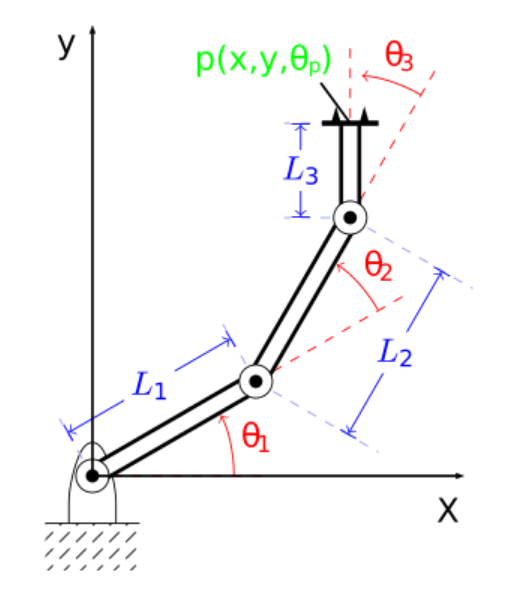

In [1]:
# Import necessary libraries
import math
import numpy as np

# Task 1: Model
class ManipulatorModel:
    def __init__(self, L1=1.0, L2=1.0, L3=1.0):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3

# Task 2: Forward Kinematics
def forward_kinematics(model, theta1, theta2, theta3):
    x = model.L1 * math.cos(theta1) + model.L2 * math.cos(theta1 + theta2) + model.L3 * math.cos(theta1 + theta2 + theta3)
    y = model.L1 * math.sin(theta1) + model.L2 * math.sin(theta1 + theta2) + model.L3 * math.sin(theta1 + theta2 + theta3)
    theta_p = theta1 + theta2 + theta3
    return x, y, theta_p

# Task 3: Intersection
def is_in_circle(x, y, r, circle_center):
    distance = math.sqrt((x - circle_center[0])**2 + (y - circle_center[1])**2)
    return distance <= r

# Task 4: Inverse Kinematics
def inverse_kinematics(model, x, y, theta_p):
    # Calculate D
    D = x**2 + y**2 - model.L1**2 - model.L2**2 - model.L3**2

    # Ensure the argument for acos stays within the valid range
    cos_arg = min(max(D / (2 * model.L2 * model.L3), -1), 1)

    # Calculate theta1
    theta1 = math.atan2(y, x) - math.atan2(model.L3 * math.sin(theta_p), model.L2 + model.L3 * math.cos(theta_p))

    # Calculate theta3
    theta3 = math.acos(cos_arg)

    # Calculate theta2
    theta2 = math.atan2(y - model.L1 * math.sin(theta1), x - model.L1 * math.cos(theta1)) - math.atan2(model.L3 * math.sin(theta_p), model.L2 + model.L3 * math.cos(theta_p))

    return theta1, theta2, theta3

# Test cases
def run_tests():
    model = ManipulatorModel(L1=1.0, L2=1.0, L3=1.0)
    theta1, theta2, theta3 = 0.1, 0.2, 0.3

    # Debugging: Print initial values
    print('Initial values: theta1={}, theta2={}, theta3={}'.format(theta1, theta2, theta3))

    # Task 2: Forward Kinematics
    x, y, theta_p = forward_kinematics(model, theta1, theta2, theta3)
    print('x, y, theta_p:', x, y, theta_p)

    # Task 3: Intersection
    print('task3: ')
    if is_in_circle(x, y, 1.5, (0, 0.5)):
        print('In Circle')
    else:
        print('Not in Circle')

    # Task 4: Inverse Kinematics
    theta1, theta2, theta3 = inverse_kinematics(model, x, y, theta_p)

    # Debugging: Print final values after inverse kinematics
    print('Final values: theta1={}, theta2={}, theta3={}'.format(theta1, theta2, theta3))

# Run tests
run_tests()

Initial values: theta1=0.1, theta2=0.2, theta3=0.3
x, y, theta_p: 2.77567626931331 0.9599960967032033 0.6000000000000001
task3: 
Not in Circle
Final values: theta1=0.03298209900792376, theta2=0.18101845130887662, theta3=0.0
